In [94]:
#課題３-1
#必須課題（１）PageRankアルゴリズムの確認
#講義資料「リンク解析（１）」p12のグラフに対して，遷移確率行列が確率行列の性質を満たすよう修正し， 
#べき乗法に基づくPageRankの計算を適用し，結果を報告せよ．
#ただし，d=0.85とする．また，さまざまな初期状態分布に対してPageRank値を求めることで，
#異なる初期状態分布に対して同じPageRank値が得られることを確認せよ．


#回答：
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
%precision 2

def pagerank(A, p, d = 0.85, eps = 1e-6):
    """
      A: 遷移確率行列
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e =  np.ones(A.shape[0]) #要素が1のn次元ベクトル
    #p = e / n #PageRankベクトルの初期化（初期状態分布）
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        p_next = d * np.dot(A.T, p) + (1.0 - d) * e / n # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
    return p

#遷移確率行列が確率行列の性質を満たすように、以下のように修正した。
A = np.array([
    [0, 1/2, 1/2,0, 0, 0],
    [1/2, 0, 1/2, 0, 0,0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1/3, 0, 1/3, 1/3],
    [1/6, 1/6, 1/6, 1/6, 1/6, 1/6],
    [0, 0, 0, 1/2, 1/2, 0]
])

#違う初期状態を用意しました。
init_p1 = np.array([1/3,1/6,1/6,1/6,1/12,1/12])
init_p2 = np.array([1/6,1/6,1/6,1/6,1/6,1/6])
init_p3 = np.array([1/4,1/4,1/4,1/8,1/16,1/16])


p1 = pagerank(A,init_p1, d = 0.85, eps=1e-6)
p2 = pagerank(A,init_p2, d = 0.85, eps=1e-6)
p3 = pagerank(A,init_p3, d = 0.85, eps=1e-6)


print (p1)
print (p2)
print (p3)
#異なる初期状態分布に対して同じPageRank値が得られることを確認できました。

[ 0.19  0.35  0.28  0.06  0.07  0.05]
[ 0.19  0.35  0.28  0.06  0.07  0.05]
[ 0.19  0.35  0.28  0.06  0.07  0.05]


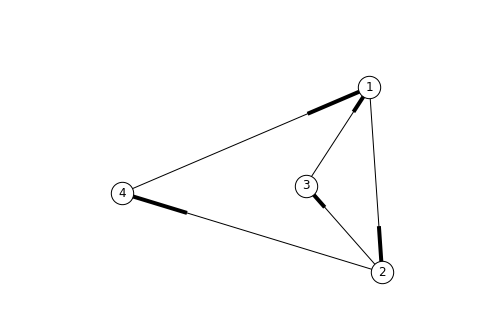

In [ ]:
#課題３-2
#講義で述べたように，マルコフ連鎖が一意の定常分布 π を持つためには，そのマルコフ連鎖は既約かつ非周期的である必要がある．
#そこで，「既約ではあるが非周期的でないマルコフ連鎖」であるようなウェブグラフGを用意し，
#Gに対してテレポーテーションを用いない単純なPageRankアルゴリズム（すなわち，p=ATp）に基づくべき乗法を適用することで，
#初期状態分布によってはPageRankベクトルが収束しない場合があることを確認せよ．
#用意したウェブグラフGをNetworkXで可視化すること
#用意したウェブグラフGは，講義で使用した例とは異なる例を用いること


#回答：
import numpy as np
import numpy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt

%matplotlib inline
%precision 2

def pagerank(A, p, d = 0.85, eps = 1e-6):
    """
      A: 遷移確率行列
      d: damping factor
      eps: 誤差（eps以下になれば終了）
    """
    n = A.shape[0]  #ページ数n
    e =  np.ones(A.shape[0]) #要素が1のn次元ベクトル
    #p = e / n #PageRankベクトルの初期化（初期状態分布）
    while True: # while Trueとしているが，実際には一定回数以上ループを繰り返すとアルゴリズムを終了するような設計がよい
        p_next =  np.dot(A.T, p)  # PageRankベクトルの更新
        if lg.norm(p_next - p, ord=1) <= eps: #差のL1ノルムがeps以下になれば，終了
            p = p_next
            break
        p = p_next
    print (p) 
    return p


#「既約ではあるが非周期的でないマルコフ連鎖」であるようなグラフ：
A = np.array([
    [0, 1, 0, 0],
    [0, 0, 1/2, 1/2],
    [1, 0, 0, 0], 
    [1, 0, 0, 0]
])

init_p1 = np.array([1/8, 1/8, 1/8, 5/8])
init_p2 = np.array([1/4, 1/4, 1/4,1/4])
init_p3 = np.array([1, 0, 0, 0])

G = nx.DiGraph()
G.add_nodes_from([1,2,3,4,])
G.add_edges_from([(1,2),(2,3),(3,1),(2,4),(4,1)])

pos = nx.spring_layout(G) # ばねモデルに基づくグラフのレイアウト
nx.draw(G, pos, with_labels=True, node_size=500, node_color="w")
plt.show()

p1 = pagerank(A,init_p1, d = 0.85, eps=1e-6)
p2 = pagerank(A,init_p2, d = 0.85, eps=1e-6)
p3 = pagerank(A,init_p3, d = 0.85, eps=1e-6)

#こちらのグラフでは、ページランクの計算が終わりません。
#よって、収束しないと判断できる

In [91]:
#課題4(Ranking SVM)

#サンプルファイルとは別のテストデータを用意し，サンプルファイルの訓練データで学習したモデルをそのテストデータに適用してみよ． 
#また，訓練データを観察し，どのような特徴量をもった文書が上位にランク付けされそうか自分で推測し，
#テストデータに対するランキング結果がその自分の推測と近いかどうか考察せよ．

#回答：

#モデルを訓練する
! ../bin/svm_rank_learn -c 0.03 ../data/svmrank_sample/train.dat ../data/svmrank_sample/model

#別テストデータ用意し、予測をする：
! ../bin/svm_rank_classify ../data/svmrank_sample/test2.dat ../data/svmrank_sample/model ../data/svmrank_sample/prediction
!cat ../data/svmrank_sample/prediction


#考察：
#訓練データを観察したところ、f1とf5が高い文書が上位にランク付けされそうです。
#結果：実際、f1とf5が高く設定一行目が一番上位で、
#f1とf5を徐々に下げて行きながら他のfを上げていくと、
#値が降下していくことが確認されました。

Reading training examples...done
Training set properties: 5 features, 3 rankings, 12 examples
NOTE: Adjusted stopping criterion relative to maximum loss: eps=0.004667
Iter 1: ...*(NumConst=1, SV=1, CEps=4.6667, QPEps=0.0000)
Iter 2: ...*(NumConst=2, SV=1, CEps=4.2166, QPEps=0.0000)
Iter 3: ...(NumConst=2, SV=1, CEps=0.0000, QPEps=0.0000)
Final epsilon on KKT-Conditions: 0.00000
Upper bound on duality gap: -0.00000
Dual objective value: dval=0.13325
Primal objective value: pval=0.13325
Total number of constraints in final working set: 2 (of 2)
Number of iterations: 3
Number of calls to 'find_most_violated_constraint': 9
Number of SV: 1 
Norm of weight vector: |w|=0.11619
Value of slack variable (on working set): xi=4.21663
Value of slack variable (global): xi=4.21663
Norm of longest difference vector: ||Psi(x,y)-Psi(x,ybar)||=3.87313
Runtime in cpu-seconds: 0.00
Compacting linear model...done
Writing learned model...done
Reading model...done.
Reading test examples...done.
Classifying te